A large telecom company wants to know why customers are churning. This project is tasked with first finding out the reason behind the customer churn rate and then preparing a plan to reduce it. The data consists of the current bill amount for each customer (Current Bill Amt), the average weekly phone usage by each customer for weekend days (Avg Calls) in seconds, the average phone usage by each customer during weekdays (Avg Calls Weekdays) in seconds, the account holder's age (Account Age), and the average number of days the customer is late on their bill payment (Avg Days Delinquent).

Google Data Studio Dashboard

https://datastudio.google.com/reporting/645cbc00-8fa9-46f3-9768-58722e5b5002

Streamlit link

https://share.streamlit.io/taylorec/marketing_analytics_telco_churn_streamlit/main/Telco_Churn_Model.py

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv(r'/content/drive/MyDrive/Marketing-Analytics/Data/Telco_Churn_Data.csv')
data.head(5)

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,184.730,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,187.291,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,165.256,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,179.491,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,49.465,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [ ]:
len(data)

4708

In [ ]:
data.shape

(4708, 15)

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   float64
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

In [ ]:
# method for renaming the columns; replace spaces with underscores
data.columns=data.columns.str.replace(' ','_')

In [ ]:
# fix typo in Avg_Hours_WorkOrderOpenned column
data['Avg_Hours_WorkOrderOpened'] = data['Avg_Hours_WorkOrderOpenned']

# drop the older column (with typo)
data.drop(["Avg_Hours_WorkOrderOpenned"],axis=1,inplace=True)

In [ ]:
data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpened'],
      dtype='object')

In [ ]:
data.describe()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpened
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,257.774606,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,223.658631,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-8.970000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,159.744000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,198.302000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,296.387000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,4226.651000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


In [ ]:
data.describe(include='object')

,Target_Churn,Acct_Plan_Subtype,Complaint_Code
count,4708,4708,4701
unique,2,2,6
top,No Churn,Silver,Billing Problem
freq,2421,3914,2908


In [ ]:
# change the following categorical columns to object type
data['Target_Code']=data.Target_Code.astype('object')
data['Condition_of_Current_Handset']=data.Condition_of_Current_Handset.astype('object') 
data['Current_TechSupComplaints']=data.Current_TechSupComplaints.astype('object') 

In [ ]:
data.describe(include='object')

,Target_Churn,Target_Code,Acct_Plan_Subtype,Complaint_Code,Current_TechSupComplaints,Condition_of_Current_Handset
count,4708,4708,4708,4701,4708,4264.0
unique,2,2,2,6,11,3.0
top,No Churn,0,Silver,Billing Problem,0,1.0
freq,2421,2421,3914,2908,3589,4186.0


In [ ]:
# Percentage of missing Values present

round(data.isnull().sum()/len(data)*100,2)

Target_Churn                    0.00
Target_Code                     0.00
Current_Bill_Amt                0.00
Avg_Calls                       0.00
Avg_Calls_Weekdays              0.00
Account_Age                     0.00
Percent_Increase_MOM            0.00
Acct_Plan_Subtype               0.00
Complaint_Code                  0.15
Avg_Days_Delinquent             0.00
Current_TechSupComplaints       0.00
Current_Days_OpenWorkOrders     0.00
Equipment_Age                   0.00
Condition_of_Current_Handset    9.43
Avg_Hours_WorkOrderOpened       0.00
dtype: float64

In [ ]:
data.Complaint_Code.value_counts()

Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

In [ ]:
data.Condition_of_Current_Handset.value_counts()

1.0    4186
2.0      74
3.0       4
Name: Condition_of_Current_Handset, dtype: int64

In [ ]:
# fill na values with modes (most frequent values)
data['Complaint_Code']=data['Complaint_Code'].fillna(value='Billing Problem') 
data['Condition_of_Current_Handset']=data['Condition_of_Current_Handset'].fillna(value=1) 
data['Condition_of_Current_Handset']=data.Condition_of_Current_Handset.astype('object')

In [ ]:
data.Complaint_Code.value_counts()

Billing Problem         2915
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

In [ ]:
data.Condition_of_Current_Handset.value_counts()

1.0    4630
2.0      74
3.0       4
Name: Condition_of_Current_Handset, dtype: int64

In [ ]:
data['Target_Churn'].value_counts(0)

No Churn    2421
Churn       2287
Name: Target_Churn, dtype: int64

In [ ]:
data['Target_Churn'].value_counts(1)*100 # value counts as %

No Churn    51.42311
Churn       48.57689
Name: Target_Churn, dtype: float64

In [ ]:
summary_churn = data.groupby('Target_Churn')
summary_churn.mean()

,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpened
Target_Churn,,,,,,,,,
Churn,262.375220,9348.878298,37524.030899,25.418452,-0.281309,19.075339,2.498907,11.191517,0.960482
No Churn,253.428632,9194.885309,38698.530221,26.704254,0.255769,9.144444,2.382074,10.453119,0.913846


In [ ]:
summary_churn.describe(include='object')

Target_Code             ... Condition_of_Current_Handset             
                   count unique top  ...                       unique  top    freq
Target_Churn                         ...                                          
Churn               2287      1   1  ...                          3.0  1.0  2251.0
No Churn            2421      1   0  ...                          3.0  1.0  2379.0

[2 rows x 20 columns]

,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Days_OpenWorkOrders,Equipment_Age,Avg_Hours_WorkOrderOpened
Current_Bill_Amt,1.000000,0.352535,0.428040,0.003292,-0.015588,0.024285,0.076418,-0.040732,0.016852
Avg_Calls,0.352535,1.000000,0.727226,-0.023758,-0.040899,0.019407,0.078428,-0.099348,0.013441
Avg_Calls_Weekdays,0.428040,0.727226,1.000000,0.029957,-0.044496,0.017134,0.065318,-0.103769,0.013577
Account_Age,0.003292,-0.023758,0.029957,1.000000,-0.004022,-0.047542,-0.026270,0.073503,0.005059
Percent_Increase_MOM,-0.015588,-0.040899,-0.044496,-0.004022,1.000000,0.049768,-0.003013,-0.003819,-0.008848
Avg_Days_Delinquent,0.024285,0.019407,0.017134,-0.047542,0.049768,1.000000,-0.001686,0.014047,0.000168
Current_Days_OpenWorkOrders,0.076418,0.078428,0.065318,-0.026270,-0.003013,-0.001686,1.000000,-0.037599,0.029384
Equipment_Age,-0.040732,-0.099348,-0.103769,0.073503,-0.003819,0.014047,-0.037599,1.000000,-0.014347
Avg_Hours_WorkOrderOpened,0.016852,0.013441,0.013577,0.005059,-0.008848,0.000168,0.029384,-0.014347,1.000000


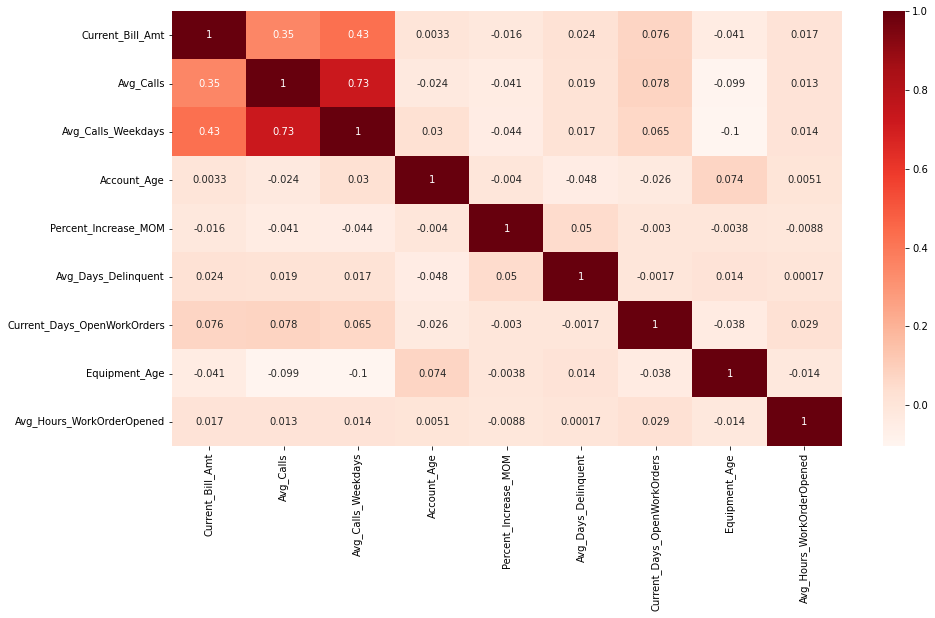

In [ ]:
# correlation matrix
corr = data.corr() 
plt.figure(figsize=(15,8)) 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True,cmap='Reds') 
corr

### Univariate Analysis

Text(0, 0.5, 'No of Customers')

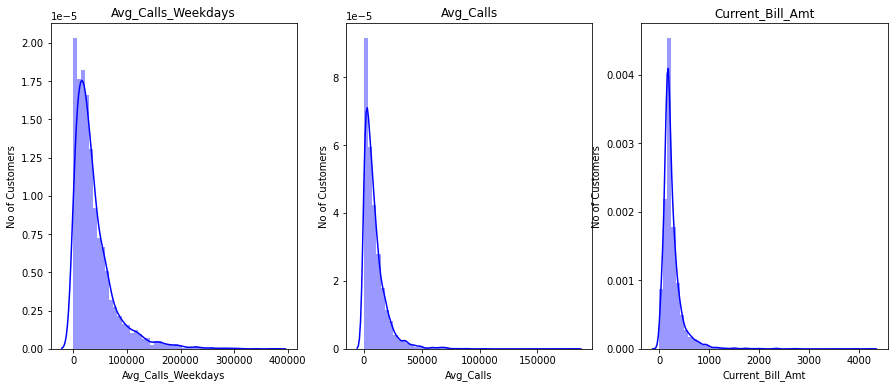

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6)) 
sns.distplot(data.Avg_Calls_Weekdays, kde=True, color="blue", ax=axes[0]).set_title('Avg_Calls_Weekdays') 
axes[0].set_ylabel('No of Customers') 
sns.distplot(data.Avg_Calls, kde=True, color="blue", ax=axes[1]).set_title('Avg_Calls') 
axes[1].set_ylabel('No of Customers') 
sns.distplot(data.Current_Bill_Amt, kde=True, color="blue", ax=axes[2]).set_title('Current_Bill_Amt') 
axes[2].set_ylabel('No of Customers')

### Bivariate Analysis

Text(0.5, 1.0, 'Customer Complaint Code Distribution')

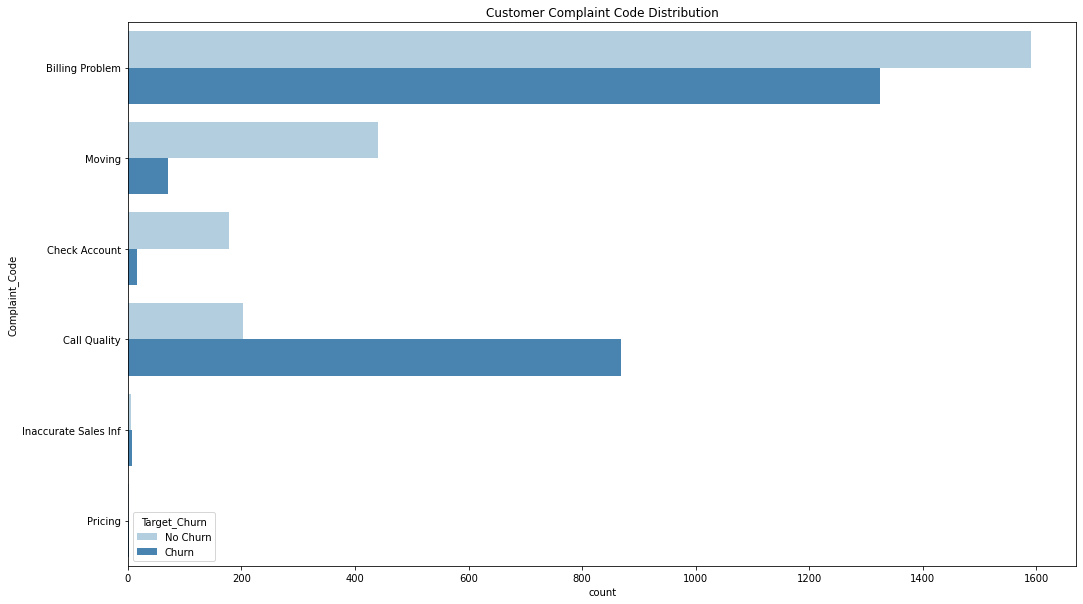

In [ ]:
plt.figure(figsize=(17,10)) 
p=sns.countplot(y="Complaint_Code", hue='Target_Churn', data=data,palette="Blues")  
p.set_title('Customer Complaint Code Distribution')

Text(0.5, 1.0, 'Customer Acct_Plan_Subtype Distribution')

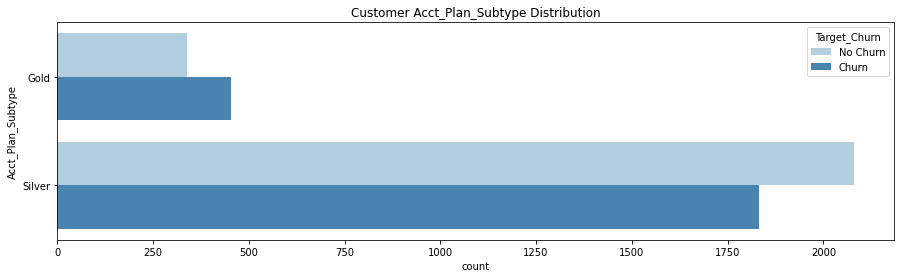

In [ ]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(y="Acct_Plan_Subtype", hue='Target_Churn', data=data,palette="Blues") 
p.set_title('Customer Acct_Plan_Subtype Distribution') 

Text(0.5, 1.0, 'Customer Current_TechSupComplaints Distribution')

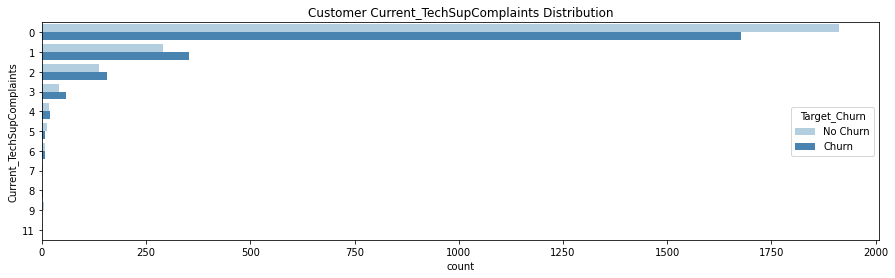

In [ ]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(y="Current_TechSupComplaints", hue='Target_Churn', data=data,palette="Blues")
p.set_title('Customer Current_TechSupComplaints Distribution') 

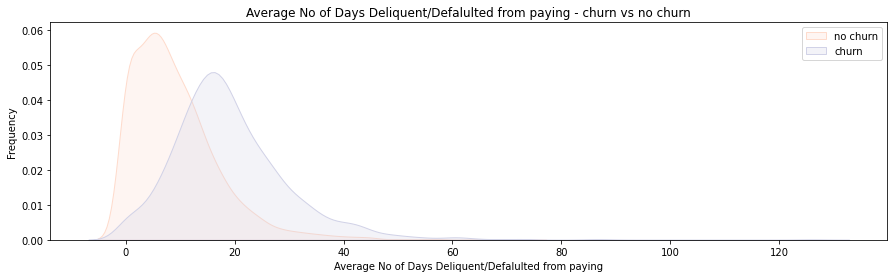

In [ ]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), 'Avg_Days_Delinquent'] , color=sns.color_palette("Reds")[0], shade=True,label='no churn') 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), 'Avg_Days_Delinquent'] , color=sns.color_palette("Purples")[1], shade=True, label='churn') 
ax.set(xlabel='Average No of Days Deliquent/Defalulted from paying', ylabel='Frequency') 
plt.title('Average No of Days Deliquent/Defalulted from paying - churn vs no churn')
plt.legend()

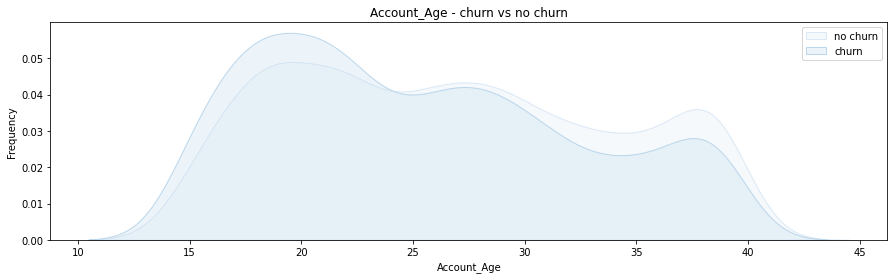

In [ ]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), 'Account_Age'], color=sns.color_palette("Blues")[0], shade=True,label='no churn') 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), 'Account_Age'], color=sns.color_palette("Blues")[1], shade=True, label='churn') 
ax.set(xlabel='Account_Age', ylabel='Frequency') 
plt.title('Account_Age - churn vs no churn') 
plt.legend()

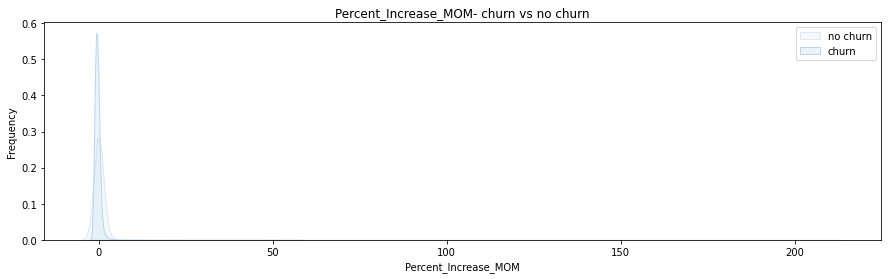

In [ ]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), 'Percent_Increase_MOM'], color=sns.color_palette("Blues")[0], shade=True, label='no churn') 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), 'Percent_Increase_MOM'], color=sns.color_palette("Blues")[1], shade=True, label='churn') 
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency') 
plt.title('Percent_Increase_MOM- churn vs no churn')
plt.legend()

### Save data to GCS bucket

In [2]:
project_id = 'sixth-flag-316719'

In [3]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
import uuid

bucket_name = 'marketing_data_analytics'

In [ ]:
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
Data_Studio_df = data.copy()

Data_Studio_df.to_csv('Telco.csv')

!gcloud config set project {project_id}

import uuid

bucket_name = 'marketing_data_analytics'

!gsutil mb gs://{bucket_name}

!gsutil cp Telco.csv gs://{bucket_name}/

Updated property [core/project].
Creating gs://marketing_data_analytics/...
ServiceException: 409 A Cloud Storage bucket named 'marketing_data_analytics' already exists. Try another name. Bucket names must be globally unique across all Google Cloud projects, including those outside of your organization.
Copying file://Telco.csv [Content-Type=text/csv]...
/ [1 files][444.0 KiB/444.0 KiB]                                                
Operation completed over 1 objects/444.0 KiB.                                    


### Feature Selection

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target_Churn                  4708 non-null   object 
 1   Target_Code                   4708 non-null   object 
 2   Current_Bill_Amt              4708 non-null   float64
 3   Avg_Calls                     4708 non-null   float64
 4   Avg_Calls_Weekdays            4708 non-null   float64
 5   Account_Age                   4708 non-null   int64  
 6   Percent_Increase_MOM          4708 non-null   float64
 7   Acct_Plan_Subtype             4708 non-null   object 
 8   Complaint_Code                4708 non-null   object 
 9   Avg_Days_Delinquent           4708 non-null   float64
 10  Current_TechSupComplaints     4708 non-null   object 
 11  Current_Days_OpenWorkOrders   4708 non-null   float64
 12  Equipment_Age                 4708 non-null   int64  
 13  Con

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
data['Target_Code'] = data['Target_Code'].astype('int64') # y-variable
data["Acct_Plan_Subtype"] = data["Acct_Plan_Subtype"].astype('category').cat.codes
data["Complaint_Code"] = data["Complaint_Code"].astype('category').cat.codes

In [ ]:
data["Acct_Plan_Subtype"].value_counts()

1    3914
0     794
Name: Acct_Plan_Subtype, dtype: int64

In [ ]:
data["Complaint_Code"].value_counts()

0    2915
1    1070
4     511
2     195
3      13
5       4
Name: Complaint_Code, dtype: int64

In [ ]:
data['Target_Code'].value_counts()

0    2421
1    2287
Name: Target_Code, dtype: int64

In [ ]:
data[["Acct_Plan_Subtype","Complaint_Code"]].head()

,Acct_Plan_Subtype,Complaint_Code
0,0,0
1,1,4
2,0,0
3,1,0
4,0,0


### Split data

In [ ]:
target = 'Target_Code' 
X = data.drop(['Target_Code','Target_Churn'], axis=1) 
y = data['Target_Code'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

### **Random Forest**

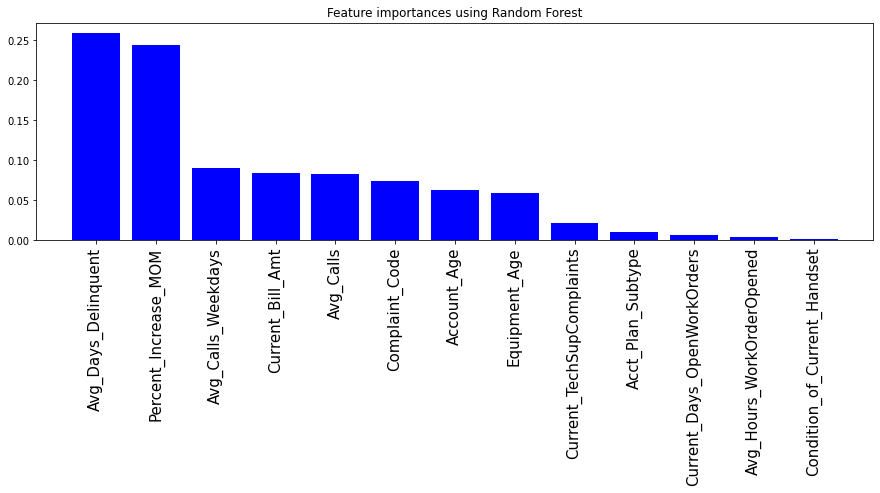

In [ ]:
# Using random forest to analyze predictive features
forest=RandomForestClassifier(n_estimators=500, random_state=1).fit(X_train,y_train)

importances=forest.feature_importances_
features = data.drop(['Target_Code','Target_Churn'],axis=1).columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="blue", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### **Logistic Regression**

Logistic Regression model outputs a probability $p(X)$ between 0 and 1 for all values of $x \in X$. 


$logistic function: p(X) = \frac{e^{B_0 + B_1X}}{1 + e^{B_0 + B_1X}} $
 * sigmoid function with output range of [0,1]


odds: $ \frac{p(X)}{1-p(X)} = e^{B_0+B_1X}$
 * output range is [0, ∞]

$logit$ or log-odds: $ \log(\frac{p(X)}{1-p(X)}) = {B_0+B_1X} $
 * output range is between [-∞, ∞] and is used for regression


In [ ]:
import statsmodels.api as sm 
top7_features = ['Avg_Days_Delinquent','Percent_Increase_MOM',\
                 'Avg_Calls_Weekdays','Current_Bill_Amt',\
                 'Avg_Calls','Complaint_Code','Account_Age'] 
logReg = sm.Logit(y_train, X_train[top7_features]) 
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.551146
         Iterations 8


In [ ]:
logistic_regression.summary

<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x7fe117ec7c10>>

In [ ]:
logistic_regression.params

Avg_Days_Delinquent     0.110923
Percent_Increase_MOM   -0.392204
Avg_Calls_Weekdays     -0.000003
Current_Bill_Amt       -0.000018
Avg_Calls              -0.000002
Complaint_Code         -0.208369
Account_Age            -0.047949
dtype: float64

In [ ]:
coef = logistic_regression.params 

def y (coef, Avg_Days_Delinquent, Percent_Increase_MOM, \
       Avg_Calls_Weekdays, Current_Bill_Amt, Avg_Calls, \
       Complaint_Code, Account_Age): return coef[0]*Avg_Days_Delinquent\
                                     +coef[1]\
                                     *Percent_Increase_MOM\
                                     +coef[2]\
                                     *Avg_Calls_Weekdays\
                                     +coef[3]\
                                     *Current_Bill_Amt\
                                     +coef[4]\
                                     *Avg_Calls\
                                     +coef[5]\
                                     *Complaint_Code\
                                     +coef[6]\
                                     *Account_Age

In [ ]:
import numpy as np

# Predict a customer with 
# Avg_Days_Delinquent    40
# Percent_Increase_MOM   5
# Avg_Calls_Weekdays     39000
# Current_Bill_Amt       12000
# Avg_Calls              9000
# Complaint_Code         0
# Account_Age            17
# has 81.9 % chance of churn

y1 = y(coef, 40, 5, 39000,12000,9000,0,17)
p = np.exp(y1) / (1+np.exp(y1))
p

0.7849747796120203

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_logistic = LogisticRegression(random_state=0,solver='lbfgs').fit(X_train[top7_features], y_train)

In [ ]:
clf_logistic

LogisticRegression(random_state=0)

In [ ]:
clf_logistic.score(X_test[top7_features], y_test)

0.7454031117397454

### **Support Vector Machine**

Support vector algorithms maximizes a margin between classes by fitting the widest possible hyperplane between them. In the case of non-linearly separable classes, it uses kernels to move observations into higher-dimensional space and then separates them linearly with the hyperplane there.
 * hyperplane equation: $ B_0 + B_1X_1 + B_2X_2 = 0 $
 * Points which lay on the hyperplane have to follow the above equation. 
 * Observations could fall in either of the below or above regions, also called the region of classes: $ B_0 + B_1X_1 + B_2X_2 > 0 $ and $ B_0 + B_1X_1 + B_2X_2 < 0 $


Support Vector objective function is to maximize margin M: 
 * Constraint 1: subject to  $ \sum^n_{j=1}B_j^2 = 1 $
 * Constrain 2: $ y_i(B_0 + B_1X_{i1} + B_2X_{i2} + ... + B_nX_{in} \ge M(1-ϵ_i)∀i = 1 $ 
 * Constraint 2 ensures that observations will be on the correct side of the hyperplane by taking the product of coefficients with x variables and finally, with a class variable indicator.
 * Constrain 3: $ ϵ_i \ge 0, \sum^n_{i=1}ϵ_i \le C $
 * The C value is a non-negative tuning parameter to either accommodate more or fewer overall errors in the model. Having a high value of C will lead to a more robust model, whereas a lower value creates the flexible model due to less violation of error terms. 
 * Class labels: $ y_1, y_2, ... y_m \in {\{-1, 1}\} $ 

Kernel functions are the functions that, given the original feature vectors, return the same value as the dot product of its corresponding mapped feature vectors. 
 * Kernal function: $ K(x, z) \le 𝛷(X), 𝛷(Z) $
 * Polynomial kernel function: $ K(X,X') = (1+ x*x')^k $
 * Radial Basis Function (RBF): $ K(X,X') = e(-||x-x'||^2/\sigma^2) $

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train[top7_features])
X_train_svm = scaling.transform(X_train[top7_features])
X_test_svm = scaling.transform(X_test[top7_features])

In [ ]:
clf_svm=svm.SVC(kernel='linear', C=1)

In [ ]:
clf_svm

SVC(C=1, kernel='linear')

In [ ]:
clf_svm.fit(X_train_svm,y_train)

SVC(C=1, kernel='linear')

In [ ]:
clf_svm.score(X_test_svm, y_test)

0.7637906647807637

### **Decision Tree**

The Decision tree algorithm gets their name from the inverted tree-like structures they follow. In a normal tree, the bottom part is the root, and the topmost part is the leaf of the tree. Since a decision tree follows the reverse structure, the topmost node is referred to as the root node. A node, in simple terms, is the smallest block in the decision tree. Every node has a certain rule that decides where to go next (which branch to follow). The last nodes or the terminal nodes of the decision tree are called leaves. This is where the target variable prediction happens. When a new input is provided for prediction, it first goes to the root node and then moves down to the leaf node for prediction.

Decision trees use multiple algorithms to split at the root node or sub-node. A decision tree goes through all of the features and picks the feature on which it can get the most homogeneous sub-nodes. For classification tasks, it decides the most homogeneous sub-nodes based on the information gained.

Information gain gives details on how much "information" a feature will hold about the class. Features that are perfectly separable or partitioned will give maximum information, while features that are not perfectly separable or partitioned will give us less information: $ IG(D_p,f) = I(D_p)-\frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})    $
 *  $IG$ = information gain 
 * $I$ = impurity 
 * $f$ = feature 
 * $D_p$ = parent dataset
 * $D_{left}$ = left child dataset 
 * $D_{right}$ = right child dataset
 * $N_p$ = total number of samples in the parent dataset 
 * $N_{left}$ = number of samples in the left child dataset
 * $N_{right}$ = number of samples in the right child dataset.

Gini impurity is a measure of misclassification, which applies in a multi-class classifier context. The Gini index can be defined as the criterion that would minimize the probability of misclassification: $ I_g(t) = \sum_{i=1}^k p(i|t)(1-p(i|t)) = 1 - \sum_{i=1}^k p(i|t)^2 $
 * $k$ = number of classes
 * $p(i│t)$ = proportion of samples that belong to class k for a particular node t.

In [ ]:
from sklearn import tree

In [ ]:
clf_decision = tree.DecisionTreeClassifier()

In [ ]:
clf_decision

DecisionTreeClassifier()

In [ ]:
clf_decision.fit(X_train[top7_features],y_train)

DecisionTreeClassifier()

In [ ]:
clf_decision.score(X_test[top7_features], y_test)

0.7496463932107497

### **Random Forest**

The  random forest  algorithm reduces variance/overfitting by averaging multiple decision trees, which individually suffer from high variance.

Random Forest Algorithm:
1. A random bootstrap sample (a sample drawn with replacement) of size m is chosen from the training data. This splits the training data into subsets such as Data1, Data2, and so on. 
2. Decision trees are grown on each instance of the bootstrap. These decision trees can be referred to as Learner1, Learner2, and so on. 
3. d features are chosen randomly without replacement. 
4. Each node is split using the d features selected based on objective functions, which could be information gain. 
5. Steps 1-4 are repeated k times. Eventually, this generates Model1, Model2, and so on for each subset.
6. All of the predictions from the multiple trees are aggregated and assigned a class label by majority vote.

The thumb rule for variable selection of m variables out of total variables p, is m = sqrt(p) for classification and m = p/3 for regression problems randomly to avoid correlation among the individual trees. By doing so, significant improvement in accuracies can be achieved.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=7, random_state=0)

In [ ]:
clf_random.fit(X_train[top7_features], y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [ ]:
clf_random.score(X_test[top7_features], y_test)

0.8104667609618105

### **Gradient Boosting**

Gradient boosting classifier works on the principle of boosting weak learners iteratively by shifting focus towards problematic observations that were difficult to predict in previous iterations and performing an ensemble of weak learners, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, but generalizes them by allowing optimization of an arbitrary differentiable loss function.

Gradient boosting steps:
  1. fit the model on observations producing $P_0$% accuracy; the remaining unexplained variance is captured in the error term: $Y = F(x) + error$
  2. fit another model on the error term to pull the extra explanatory component and add it to the original model, which should improve the overall accuracy: $error = G(x) + error2$
  3. the model will improve to $P_1$% accuracy and the equation looks as follows: $Y = F(x) + G(x) + error2$
  4. continue this method one more time to fit a model on the $error2$ component to extract a further explanatory component: $error2 = H(x) + error3$
  5. model accuracy is again improved to $P_2$% and the final model equation looks as follows: $Y = F(x) + G(x) + H(x) + error3$
  6. Gradient boosting improves results further by using weighted average (higher importance given to better models that predict results with greater accuracy than others) $Y = a*G(x) + B*G(x) + 𝛶*H(x) + error4$

Gradient boosting involves three elements:
 * Loss function to be optimized: Loss function depends on the type of problem being solved. In the case of regression problems, mean squared error is used, and in classification problems, logarithmic loss will be used. In boosting, at each stage, unexplained loss from prior iterations will be optimized rather than starting from scratch.
 * Weak learner to make predictions: Decision trees are used as a weak learner in gradient boosting.
 * Additive model to add weak learners to minimize the loss function: Trees are added one at a time and existing trees in the model are not changed. The gradient descent procedure is used to minimize the loss when adding trees.

Gradient Boosting Algorithm:
 1. Initialize: initializes the constant optimal constant model, which is just a single terminal node that will be utilized as a starting point to tune it further in next steps. $f_0(x) = argmin_y \sum^{N}_{i=1}L(y_i,𝛶)$
 2. For m = 1 to M:
  * For i = 1, 2, …, N compute: calculate the residuals/errors by comparing actual outcome with predicted results $ 𝑟_{im} = -[\frac{∂L(y_i,f(x_i))}{∂f(x_i)} ]f = f_{m-1}$
  * Fit a regression tree to the targets $r_{im}$ giving terminal regions $R_{jm}$, $j$ = 1, 2, …, $J_m$: the next decision tree will be fitted on error terms to bring in more explanatory power to the model. 
  * For $j$ = 1, 2, …, $J_m$, compute: the next decision tree will be fitted on error terms to bring in more explanatory power to the model $ 𝛶_{jm} = argmin_{𝛶} \sum_{x_i \in R_{jm}} L(y_i, f_{m-1}(x_i)+𝛶) $
  * d) Update: add the extra component to the model at last iteration. $ f_m(x) = f_{m-1}(x) + ∑^{J_m}_{j=1} 𝛶_{jm}I(x \in R_{jm}) $
 3. Output: ensemble all weak learners to create a strong learner. $ \hat{f}(x) = f_m(x) $ 


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(n_estimators=120, random_state=0)

In [ ]:
GBC.fit(X_train[top7_features], y_train)

GradientBoostingClassifier(n_estimators=120, random_state=0)

In [ ]:
GBC.score(X_test[top7_features], y_test)

0.8330975954738331

# Standardization

$ x^i (std) = \frac{x^i - \mu_x}{\sigma_x} $

 * $x^i$ - input data
 * $ \mu_x $ - mean
 * $\sigma_x$ - standard deviation

In [ ]:
from sklearn import preprocessing

In [ ]:
# Features to transform 
top5_features=['Avg_Calls_Weekdays', 'Current_Bill_Amt', 'Avg_Calls', 'Account_Age','Avg_Days_Delinquent']

In [ ]:
# Features Left
top2_features=['Percent_Increase_MOM','Complaint_Code']

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train[top5_features]) 
X_train_scalar=pd.DataFrame\
(scaler.transform(X_train[top5_features]), columns = X_train[top5_features].columns) 
X_test_scalar=pd.DataFrame(scaler.transform(X_test[top5_features]), columns = X_test[top5_features].columns)

In [ ]:
X_train_scalar_combined=pd.concat([X_train_scalar, X_train[top2_features].reset_index(drop=True)], axis=1, sort=False)

In [ ]:
X_test_scalar_combined=pd.concat([X_test_scalar, X_test[top2_features].reset_index(drop=True)], axis=1, sort=False)

In [ ]:
clf_random.fit(X_train_scalar_combined, y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [ ]:
clf_random.score(X_test_scalar_combined, y_test)

0.8118811881188119

Scaling did not improve the Random Forest model. At this point, the Gradient Boosting method is the most accurate predictive model for this data. 

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
parameters = [ {'min_samples_split': [9,10], \
                'n_estimators':[100,150,160],\
                'max_depth': [5,7]}]

In [ ]:
clf_random_grid = GridSearchCV(RandomForestClassifier(), \
                               parameters, cv = StratifiedKFold\
                               (n_splits = 3)) 
clf_random_grid.fit(X_train_scalar_combined, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 7], 'min_samples_split': [9, 10],
                          'n_estimators': [100, 150, 160]}])

In [ ]:
print('best score train:', clf_random_grid.best_score_)
print('best parameters train: ', clf_random_grid.best_params_)

best score train: 0.7982977753433861
best parameters train:  {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 150}


In [ ]:
clf_random_grid.score(X_test_scalar_combined, y_test)

0.8217821782178217

# Performance Metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

In [ ]:
clf_random_grid = RandomForestClassifier(n_estimators=150, max_depth=7, min_samples_split=10, random_state=0)

In [ ]:
clf_random_grid.fit(X_train_scalar_combined, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=150,
                       random_state=0)

In [ ]:
y_pred=clf_random_grid.predict(X_test_scalar_combined)

In [ ]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.85      0.79      0.82       364
       Churn       0.80      0.85      0.82       343

    accuracy                           0.82       707
   macro avg       0.82      0.82      0.82       707
weighted avg       0.83      0.82      0.82       707



In [ ]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm, index = ['No Churn','Churn'], columns = ['No Churn','Churn'])

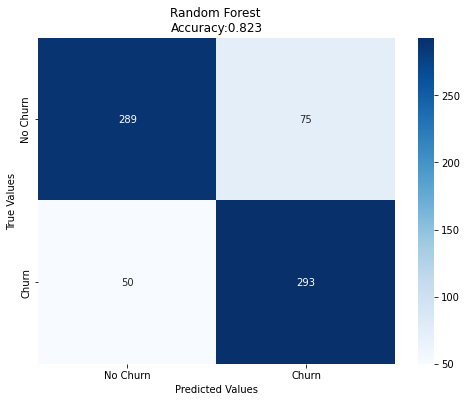

In [ ]:
cm = confusion_matrix(y_test, y_pred)  
cm_df = pd.DataFrame(cm, index = ['No Churn','Churn'], columns = ['No Churn','Churn']) 
plt.figure(figsize=(8,6)) 
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues') 
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred))) 
plt.ylabel('True Values') 
plt.xlabel('Predicted Values') 

plt.show()

In [ ]:
GBC.score(X_test[top7_features], y_test)
GBC_predict = GBC.predict(X_test[top7_features])

cm2 = confusion_matrix(y_test, GBC_predict) 

cm_df2 = pd.DataFrame(cm2, index = ['No Churn','Churn'], columns = ['No Churn','Churn'])

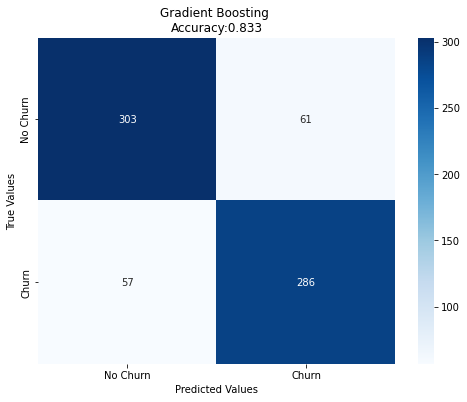

In [ ]:
plt.figure(figsize=(8,6)) 
sns.heatmap(cm_df2, annot=True,fmt='g',cmap='Blues') 
plt.title('Gradient Boosting \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, GBC_predict))) 
plt.ylabel('True Values') 
plt.xlabel('Predicted Values') 
plt.show()

In [ ]:
from sklearn.metrics import roc_curve,auc

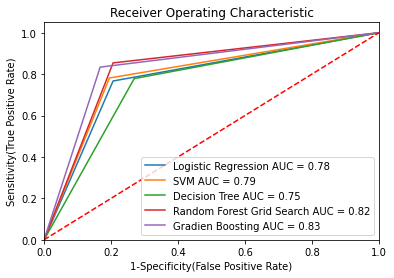

In [ ]:
models = [
{
    'label': 'Logistic Regression',
    'model': clf_logistic,
},
{
    'label': 'SVM',
    'model': clf_svm,
},
{
    'label': 'Decision Tree',
    'model': clf_decision,
},
{
    'label': 'Random Forest Grid Search',
    'model': clf_random_grid,
},
{
    'label': 'Gradien Boosting',
    'model': GBC,
}
]

for m in models:
    model = m['model']
    model.fit(X_train_scalar_combined, y_train)
    y_pred=model.predict(X_test_scalar_combined)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' \
             % (m['label'], roc_auc)) 

plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.ylabel('Sensitivity(True Positive Rate)') 
plt.xlabel('1-Specificity(False Positive Rate)') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right") 
plt.show()

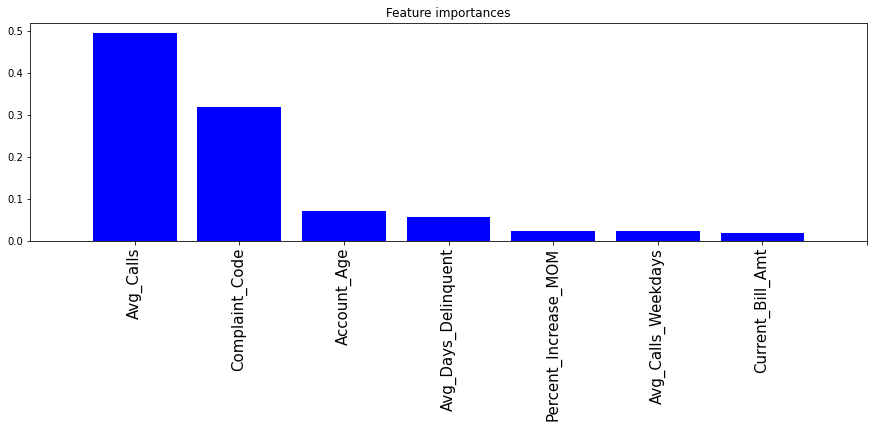

In [ ]:
importances=GBC.feature_importances_
features = X_test[top7_features].columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4))
plt.title("Feature importances")
plt.bar(range(X_test[top7_features].shape[1]), importances[indices], color="blue", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical', fontsize=15)
plt.xlim([-1, X_test[top7_features].shape[1]])
plt.show()

The Gradient Boosting model performed the best customer churn predictions on this data. To reduce the churn rate, this model suggests features Avg_Calls and Complaint_Code are the two most impactful. It makes business sense that average number of calls made by customer and type of complaint would have a high impact on customer churn. Targeting these two features, especially the complaints, should help decrease the customer churn rate.

# Save model

In [ ]:
import joblib

In [ ]:
# Save model to Drive
joblib.dump(GBC,'/content/drive/MyDrive/Marketing-Analytics/Models/GBC.joblib')

['/content/drive/MyDrive/Marketing-Analytics/Models/GBC.joblib']

## Load the Model

In [ ]:
GBC = joblib.load('/content/drive/MyDrive/Marketing-Analytics/Models/GBC.joblib')

In [ ]:
GBC.feature_importances_

array([0.05631598, 0.0227388 , 0.02249855, 0.0169573 , 0.49316101,
       0.31842864, 0.06989972])

In [ ]:
## Customer Prediction
# 12 days delinquent on average 
# 5% average monthly bill increase
# 1200 calls in seconds per weekdays on average
# Current bill amount: 120
# 450 calls in seconds per weekends on average
# Complaint code: 0
# Age of account holder: 24
GBC.predict([[12, 0.05, 1200, 120, 450, 0, 24]]) # not predicted to churn

array([0])